# Clustering: K-Means In-Depth

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

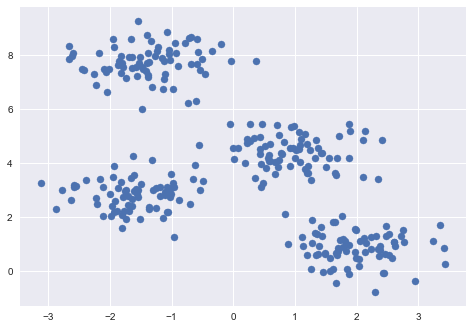

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

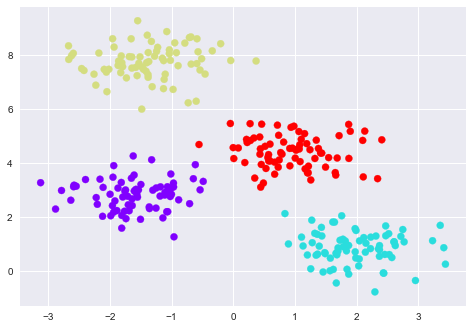

In [3]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

C:\Users\joshua.chen\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


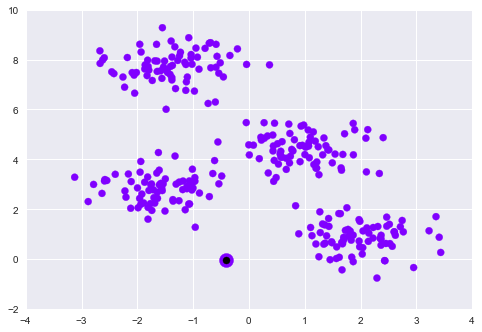

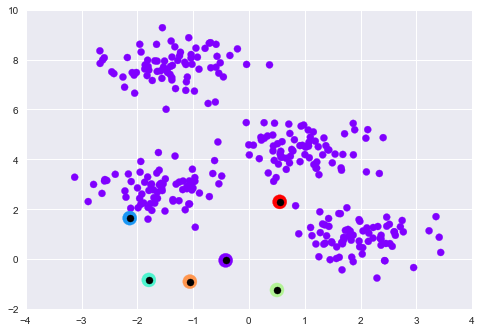

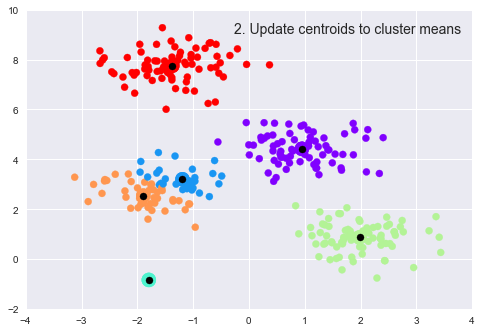

In [4]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
print(clusters)
print(est.cluster_centers_.shape)

[8 4 4 ..., 4 7 7]
(10, 64)


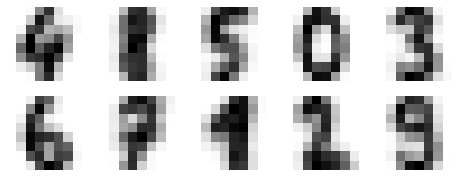

In [6]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [11]:
from scipy.stats import mode
#預測資料的分群數據
labels = np.zeros_like(clusters)
print(labels)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
print(labels)    

[0 0 0 ..., 0 0 0]
[0 8 8 ..., 8 9 9]


[[ -1.25946361  21.27487973]
 [  7.95761556 -20.76870507]
 [  6.99191919  -9.95598091]
 ..., 
 [ 10.80128048  -6.96024831]
 [ -4.87209058  12.42394163]
 [ -0.34439629   6.36555811]]
0.795214245965


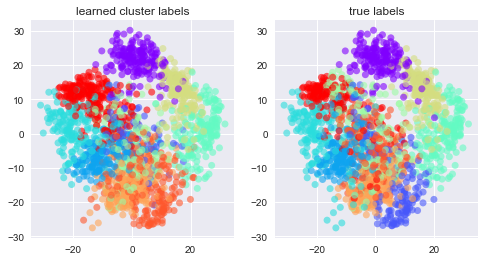

In [14]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)
print(X)
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');
from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   5   0   0 164   0   0   8   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   6   3   2   0   4   2   5 100  52]
 [  0  20   0   6   0   4   0   8   2 140]]


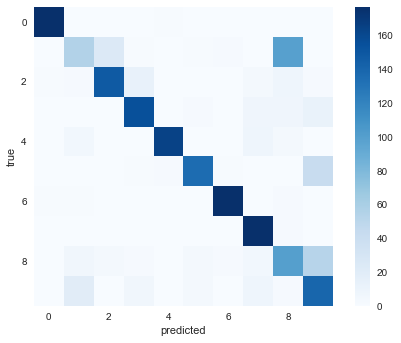

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))
#confusion_matrix(真實,預測)
plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# Example: KMeans for Color Compression

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ..., 
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ..., 
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ..., 
 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ..., 
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ..., 
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ..., 
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]
(427, 640, 3)


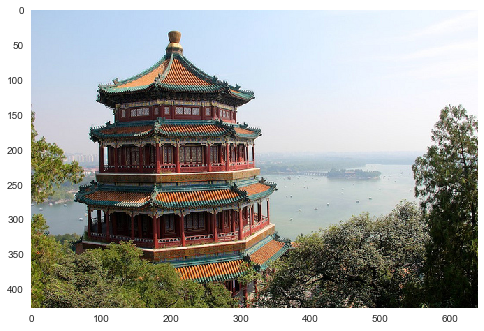

In [20]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
print(china)
#imshow直接把數值轉成圖片(RGB)
plt.imshow(china)
plt.grid(False);
print(china.shape) # (height,width,RGB)

In [21]:
X = (china / 255.0).reshape(-1, 3)
print(X)
print(X.shape)

[[ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 ..., 
 [ 0.16862745  0.19215686  0.15294118]
 [ 0.05098039  0.08235294  0.02352941]
 [ 0.05882353  0.09411765  0.02745098]]
(273280, 3)


(143, 214, 3)
[ 2  2  2 ..., 59  4  4]
[[ 0.95037382  0.67132177  0.44062632]
 [ 0.22451487  0.2258513   0.189187  ]
 [ 0.7297628   0.82022633  0.92397907]
 [ 0.48005957  0.46368826  0.40400099]
 [ 0.05485839  0.05726282  0.02834621]
 [ 0.97094675  0.9750675   0.99337405]
 [ 0.72962863  0.7054667   0.63039667]
 [ 0.33604592  0.33280504  0.18859088]
 [ 0.84137376  0.91257801  0.98720457]
 [ 0.71529412  0.34030501  0.24014524]
 [ 0.74863946  0.79294718  0.80062525]
 [ 0.53053922  0.52011438  0.25080065]
 [ 0.55955798  0.52783505  0.4442423 ]
 [ 0.12181561  0.12805638  0.11587603]
 [ 0.92989206  0.95947372  0.9959277 ]
 [ 0.31044441  0.16759369  0.13735603]
 [ 0.8733564   0.5216609   0.31976932]
 [ 0.40616477  0.39813604  0.35448237]
 [ 0.80955241  0.81685347  0.83025419]
 [ 0.89589461  0.90335259  0.91976541]
 [ 0.64799178  0.63363378  0.58244782]
 [ 0.14351449  0.14958339  0.0625627 ]
 [ 0.23003314  0.23598453  0.06792323]
 [ 0.74651486  0.49497786  0.3485389 ]
 [ 0.70724408  0.75134849

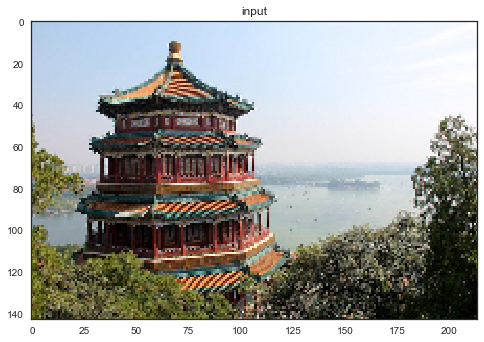

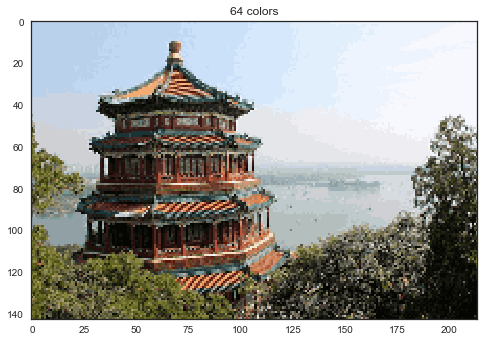

In [26]:
# reduce the size of the image for speed
#每三張跳一次，只剩三分之一
image = china[::3, ::3]
n_colors = 64
print(image.shape)
X = (image / 255.0).reshape(-1, 3)

model = KMeans(n_colors)
labels = model.fit_predict(X)
print(labels)
colors = model.cluster_centers_
print(colors)
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

# Density Estimation: Gaussian Mixture Models

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

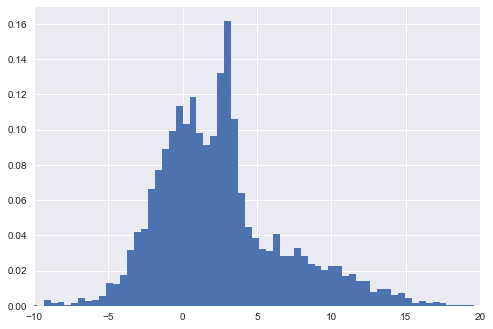

In [50]:
np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

# Validation and Model Selection


In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import load_iris
